Granger Causality for dummies : If A can predict the time series B, A causes B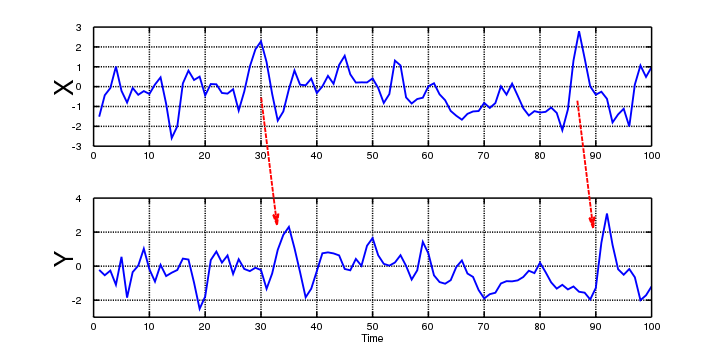

We investigate the example from Koba et al. 2023 Biorxiv:
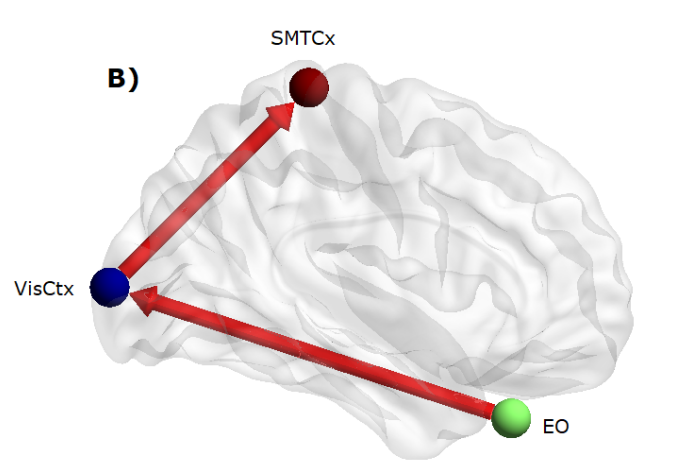

In [1]:
#@title Pairwise Granger Causality
!pip install statsmodels

import pandas as pd
import numpy as np

# Blind data
eyes = pd.read_csv('eyes_mean.csv', header=None)
visual = pd.read_csv('visual_raw.csv', header=None)
somatomotor = pd.read_csv('somatomotor_raw.csv', header=None)
n_subjects = eyes.shape[1]

'''
#Motor data
subject_file = "sub-102109_TS.txt"
time_series = np.genfromtxt(subject_file, delimiter='\t')[:,1:]

'''
#Comment this to go through the whole dataset
n_subjects = 1

In [ ]:
#Do not run this for the blind experiment
np.shape(time_series)
primary =  time_series[:,7]
supplementary = time_series[:,64]
#Stationarity test (not necessary all the time)
from statsmodels.tsa.stattools import adfuller

for x in range(n_subjects):
  #Compute the stationary test, change the variable to test the other signals
  dftest = loc[:,x]#dftest = adfuller(supplementary, autolag="AIC") #.loc[:,x]

  #Print the p-values showing <0.05 if the test of stationarity is passed
  print(dftest[1])

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
# Perform Granger-Causality test
max_lags = 2
ROIs = ['visual','somatomotor','eyes']# ['primary','supplementary' ]#
causal_mat = np.zeros((len(ROIs), len(ROIs)))

def find_causality(max_lags,seriesto,seriesfrom):
  pvals = []
  for x in range(n_subjects):
    print(x)
    # Check whether the first variable is caused by the second one

    df = pd.DataFrame(list(zip(seriesto.loc[:,x], seriesfrom.loc[:,x])))
    #df = pd.DataFrame(list(zip(seriesto, seriesfrom)))

    # Difference to make the signal further stationary (it can also smooth further the signal loosing information)
    #df = pd.DataFrame(list(zip(np.diff(visual.loc[:,x])[1:], np.diff(eyes.loc[:,x])[1:])))
    #df = pd.DataFrame(list(zip(np.diff(seriesto)[1:], np.diff(seriesfrom)[1:])))

    gc_res = grangercausalitytests(df, maxlag=max_lags)
    # Remove List and Dict
    gc_res_lags =  (gc_res[max_lags])
    unlisted_gc_res_lags = gc_res_lags[0]
    pval = unlisted_gc_res_lags['ssr_ftest'][1]
    pvals.append(pval)
    #print(pvals)
    avg_pval = np.mean(pvals)
  return avg_pval,pvals

# Use a for loop to iterate over the list
j_ind = 0
for ROI_i in ROIs:
  i_ind = 0
  for ROI_j in ROIs:
     avg_pval,pvals = find_causality(max_lags, locals()[ROI_i] ,locals()[ROI_j])
     causal_mat[i_ind, j_ind] = avg_pval
     i_ind = i_ind + 1
  j_ind = j_ind + 1

#Show the causality matrix showing the p-values
print(causal_mat)

#Show the causality matrix telling the directionality (thresholding the p-values)
causal_mat<0.05

0

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=129, df_num=1
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=220.4737, p=0.0000  , df_denom=129, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=127, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=156.5830, p=0.0000  , df_denom=127, df_num=2
0

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.7601 , p=0.0013  , df_denom=128, df_num=1
ssr based chi2 test:   chi2=11.0123 , p=0.0009  , df=1
likelihood ratio test: chi2=10.5739 , p=0.0011  , df=1
parameter F test:         F=10.7601 , p=0.0013  , df_denom=128, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7509  , p=0.06

array([[False,  True, False],
       [False, False,  True],
       [False,  True, False]])